# Modeling of Telecommunication CDRs to identify network usage patterns

In [1]:
#import frequently used modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Set style for the notebook
sns.set()

# DATA WRANGLING

In [3]:
#Initialize an empty dataframe to append daily and hourly resampled data
dailyGridActivity = pd.DataFrame()
hourlyGridActivity = pd.DataFrame()

#Create a list of 62 data file names placed under directory  "./Data/" with extension .txt
import glob
filenames = glob.glob("Data/*.txt")

#Set the column names for the data read
col_list = ['gridID', 'timeInterval', 'countryCode', 'smsIn', 'smsOut', 'callIn', 'callOut', 'internet']

#Read each tab separated file into Pandas DataFrame 
for file in filenames:
    read_data = pd.read_csv(file, sep='\t',header=None, names=col_list, parse_dates=True)
    
    #Convert timeInterval column which has Epoch timestamps to UTC and then convert to Milan's local timezone and save it to column startTime
    #tz_localize(None) returns local time format instead of "UTC+1:00" format
    read_data['startTime'] = pd.to_datetime(read_data.timeInterval, unit='ms', utc=True).dt.tz_convert('CET').dt.tz_localize(None)
    
    #Drop timeInterval & countryCode columns
    read_data.drop(columns=['timeInterval','countryCode'], inplace=True)
    
    #Groupby gridID and startTime, startTime which is 10 min apart is resampled to daily aggregation 
    read_data_daily = read_data.groupby(['gridID', pd.Grouper(key='startTime', freq='D')]).sum()
    dailyGridActivity = pd.concat([dailyGridActivity,read_data_daily]).groupby(['gridID', 'startTime']).sum()
    
    #Groupby gridID and startTime, startTime which is 10 min apart is resampled to hourly aggregation 
    read_data_hourly = read_data.groupby(['gridID', pd.Grouper(key='startTime', freq='H')]).sum()
    hourlyGridActivity = pd.concat([hourlyGridActivity,read_data_hourly]).groupby(['gridID', 'startTime']).sum()
    
#Get Grid wise total volume of the activities over the 2months
totalGridActivity = dailyGridActivity.groupby('gridID').sum()


In [113]:
#Sample of format of each line as read from the input file
read_data = pd.read_csv('Data/sms-call-internet-mi-2013-11-01.txt', sep='\t',header=None, names=col_list, parse_dates=True)
read_data.head(10)

,gridID,timeInterval,countryCode,smsIn,smsOut,callIn,callOut,internet
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
5,1,1383261600000,0,0.053438,NaN,NaN,NaN,NaN
6,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
7,1,1383262200000,0,0.026137,NaN,NaN,NaN,NaN
8,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
9,1,1383262800000,0,0.027300,NaN,NaN,NaN,NaN


In [5]:
#Resampling by hour
hourlyGridActivity.head(1493)

smsIn    smsOut    callIn   callOut   internet
gridID startTime                                                             
1      2013-11-01 00:00:00  2.084285  1.104749  0.591930  0.429290  57.799009
       2013-11-01 01:00:00  1.163624  0.770031  0.190564  0.194139  44.046899
       2013-11-01 02:00:00  0.415579  0.300391  0.027925  0.135964  41.207149
       2013-11-01 03:00:00  1.152067  0.895724  0.001787  0.026137  33.022070
       2013-11-01 04:00:00  0.354453  0.511192  0.005362  0.026137  31.376930
...                              ...       ...       ...       ...        ...
2      2013-11-01 00:00:00  2.091501  1.087979  0.602031  0.438173  57.914858
       2013-11-01 01:00:00  1.178439  0.773207  0.192136  0.193979  44.151457
       2013-11-01 02:00:00  0.415258  0.302315  0.028278  0.137535  41.329761
       2013-11-01 03:00:00  1.151394  0.902170  0.000922  0.027356  33.078556
       2013-11-01 04:00:00  0.357948  0.520075  0.002765  0.027356  31.453361

[1493 rows x 5 columns]

In [6]:
#Resampling by Day
dailyGridActivity.head(65)

smsIn     smsOut     callIn    callOut     internet
gridID startTime                                                           
1      2013-11-01   78.709755  45.886570  41.108567  48.245378  1507.048349
       2013-11-02   86.415810  43.875946  47.891016  53.590637  1515.641856
       2013-11-03   77.728292  45.446780  36.145436  40.906425  1533.148425
       2013-11-04  104.793806  54.821018  67.898464  70.399418  1404.813593
       2013-11-05   97.425105  46.607029  68.735213  70.766221  1518.090111
...                       ...        ...        ...        ...          ...
       2013-12-31  124.049269  85.569336  58.372156  63.266368  1376.737573
       2014-01-01  126.893711  96.486508  43.109098  54.512429  1532.564428
2      2013-11-01   79.846206  46.480586  41.741924  49.136913  1512.859757
       2013-11-02   87.738546  44.512066  48.636353  54.521711  1522.727906
       2013-11-03   78.740671  45.881772  36.713980  41.584801  1539.831167

[65 rows x 5 columns]

In [7]:
#Total volume os activities over 2 months
totalGridActivity.head(10)

,smsIn,smsOut,callIn,callOut,internet
gridID,,,,,
1,6178.894730,3358.842325,3805.892719,3991.422048,92992.666580
2,6267.021008,3402.658923,3861.301592,4052.842143,93368.388389
3,6360.827944,3449.299959,3920.282146,4118.221405,93768.329391
4,5923.635378,3231.926757,3645.399918,3813.517635,91904.381588
5,5522.707656,3017.566898,3401.745307,3568.366951,83630.697355
6,6360.827944,3449.299959,3920.282146,4118.221405,93768.329391
7,6360.827944,3449.299959,3920.282146,4118.221405,93768.329391
8,6360.827944,3449.299959,3920.282146,4118.221405,93768.329391
9,6360.827944,3449.299959,3920.282146,4118.221405,93768.329391


In [8]:
#Create additional columns hours:hour of the day, weekdayFlag: weekend or weekday information
dailyGridActivity['weekdayFlag'] = dailyGridActivity.index.get_level_values(1)
dailyGridActivity['weekdayFlag'] = dailyGridActivity['weekdayFlag'].dt.weekday

hourlyGridActivity['weekdayFlag'] = hourlyGridActivity.index.get_level_values(1)
hourlyGridActivity['weekdayFlag'] = hourlyGridActivity['weekdayFlag'].dt.weekday

hourlyGridActivity['hours'] = hourlyGridActivity.index.get_level_values(1)
hourlyGridActivity['hours'] = hourlyGridActivity['hours'].dt.hour

dailyGridActivity['sms'] = dailyGridActivity['smsIn'] + dailyGridActivity['smsOut']
dailyGridActivity['call'] = dailyGridActivity['callIn'] + dailyGridActivity['callOut']

hourlyGridActivity['sms'] = hourlyGridActivity['smsIn'] + hourlyGridActivity['smsOut']
hourlyGridActivity['call'] = hourlyGridActivity['callIn'] + hourlyGridActivity['callOut']

totalGridActivity['sms'] = totalGridActivity['smsIn']+totalGridActivity['smsOut']
totalGridActivity['call'] = totalGridActivity['callIn']+totalGridActivity['callOut']

# EDA

### Geographical visualization of 10000 grids from the geojson file

In [9]:
#import geopandas and geojsonio modules to visualize the geojson file that contains 
#spatially aggreagted 10000 grids for city of Milan
#Note: There is some buffering trouble and file doesnot open in the browser automatically. 
#It needs to be loaded manually using "Open" -> "File" menu option in the geojson browser 
#that pops up on running the code below
import geopandas
import geojsonio
milan = geopandas.read_file('Data/milano-grid.geojson')
milan_json = milan.to_json()
_ = geojsonio.display(milan_json)

![title](images/City_of_Milan.png)

### Top 10 Grids

In [10]:
#Sort grids by total volumes of SMS, Call & Internet activities
smsGridActivity = totalGridActivity[['sms']].sort_values(by = 'sms',ascending=False)
callGridActivity = totalGridActivity[['call']].sort_values(by = 'call',ascending=False)
internetGridActivity = totalGridActivity[['internet']].sort_values(by = 'internet',ascending=False)
#Fetch the top 10 grids from the sorted grids and display them
top10 = pd.DataFrame()
top10['sms'] = smsGridActivity[:10].index.values
top10['call'] = callGridActivity[:10].index.values
top10['internet'] = internetGridActivity[:10].index.values
top10

,sms,call,internet
0,5059,5059,5161
1,5161,6064,5059
2,6064,5161,5259
3,5061,5159,5061
4,5159,5061,5258
5,5259,5259,5159
6,5262,6165,6064
7,4855,5262,4855
8,4856,6058,4856
9,6165,5162,5262


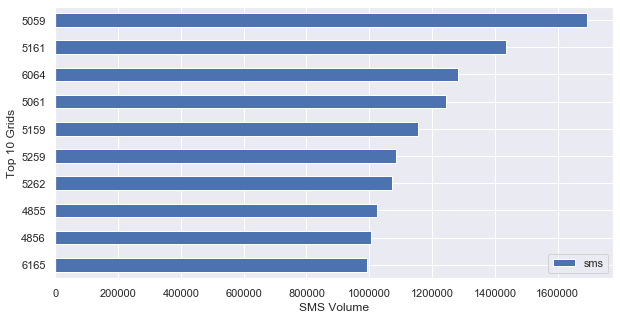

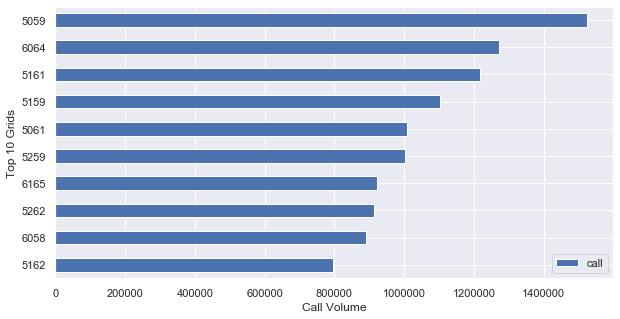

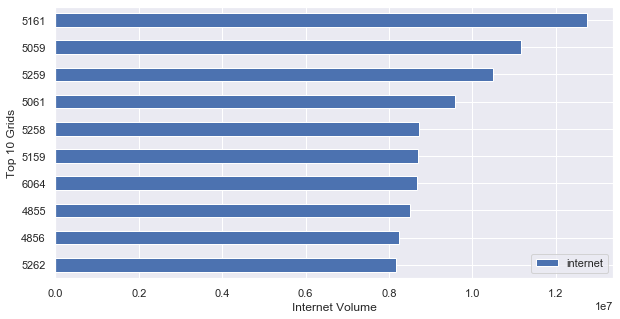

In [11]:
#Plot top 10 grids and its volume for SMS activity
ax = smsGridActivity[:10].plot(kind='barh', figsize=(10,5))
ax.invert_yaxis()
ax.set_xlabel("SMS Volume")
ax.set_ylabel("Top 10 Grids")

#Plot top 10 grids and its volume for Call activity
ax = callGridActivity[:10].plot(kind='barh', figsize=(10,5))
ax.invert_yaxis()
ax.set_xlabel("Call Volume")
ax.set_ylabel("Top 10 Grids")

#Plot top 10 grids and its volume for Internet activity
ax = internetGridActivity[:10].plot(kind='barh', figsize=(10,5))
ax.invert_yaxis()
ax.set_xlabel("Internet Volume")
ax.set_ylabel("Top 10 Grids")
plt.show()

### Mapping top Grids with real geographic locations

In [12]:
#Display only top 10 grids from the geojson file
milan = geopandas.read_file('Data/milano-grid.geojson')
#get unique values across all the columns in dataframe top10
topgrids = pd.unique(top10.values.ravel())

#New browser opens with the top 10 grids
topGridgeojson = milan.loc[milan['cellId'].isin(topgrids)]
topGridgeojson = topGridgeojson.to_json()
_ = geojsonio.display(topGridgeojson)

![title](images/Top_10_geojson.png)

In [13]:
#get the daily volumes for the top 10 grids
daily5059 = dailyGridActivity.loc[5059][['sms','call','internet']]
daily5161 = dailyGridActivity.loc[5161][['sms','call','internet']]
daily6064 = dailyGridActivity.loc[6064][['sms','call','internet']]
daily5259 = dailyGridActivity.loc[5259][['sms','call','internet']]
daily5061 = dailyGridActivity.loc[5061][['sms','call','internet']]
daily5159 = dailyGridActivity.loc[5159][['sms','call','internet']]
daily5258 = dailyGridActivity.loc[5258][['sms','call','internet']]
daily5262 = dailyGridActivity.loc[5262][['sms','call','internet']]
daily6165 = dailyGridActivity.loc[6165][['sms','call','internet']]
daily4855 = dailyGridActivity.loc[4855][['sms','call','internet']]
daily4856 = dailyGridActivity.loc[4856][['sms','call','internet']]
daily6058 = dailyGridActivity.loc[6058][['sms','call','internet']]
daily5162 = dailyGridActivity.loc[5162][['sms','call','internet']]

### SMS, Call, Internet activity comparison in top grids

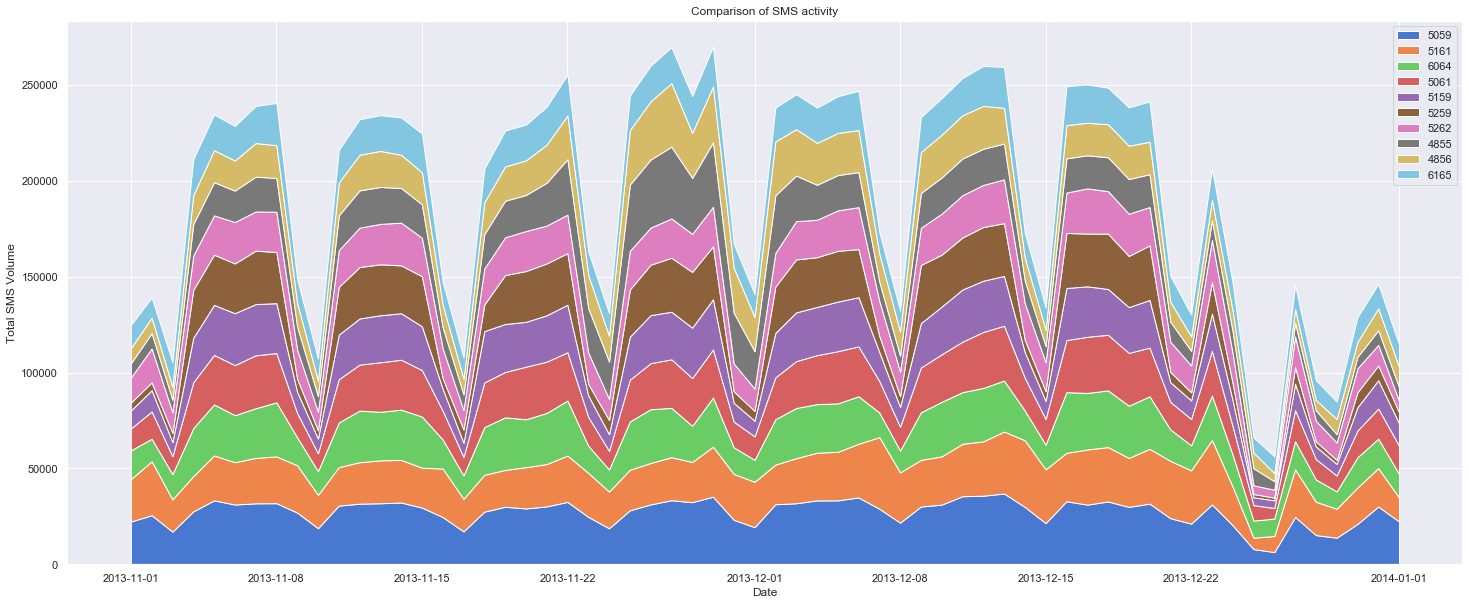

In [14]:
#Plot daily SMS activity for top 10 grids from Nov 1, 2013 to Jan 1, 2014
col = sns.color_palette("muted")
plt.figure(figsize=(25,10))
ax = plt.stackplot(daily5059.index, daily5059.sms, daily5161.sms,daily6064.sms, daily5061.sms, 
                   daily5159.sms, daily5259.sms, daily5262.sms, daily4855.sms, daily4856.sms,
                   daily6165.sms, labels = top10['sms'], colors=col)
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Total SMS Volume')
plt.title('Comparison of SMS activity')
plt.show()

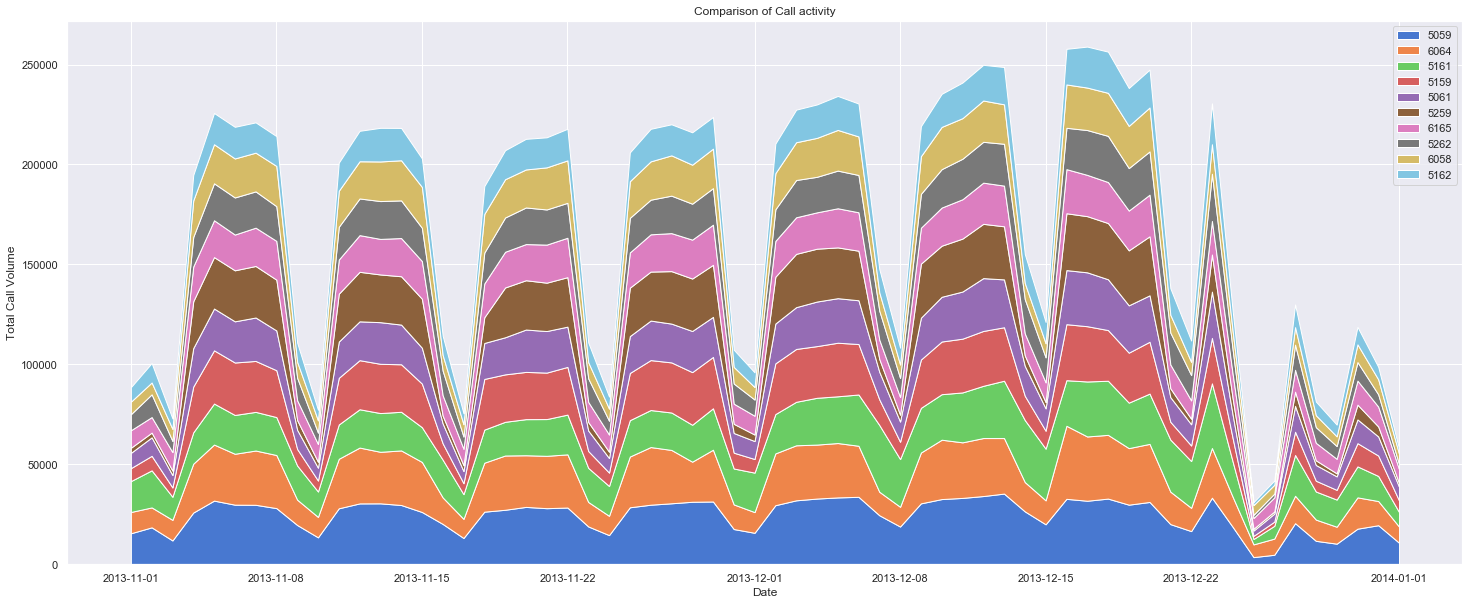

In [15]:
#Plot daily Call activity for top 10 grids from Nov 1, 2013 to Jan 1, 2014
plt.figure(figsize=(25,10))
ax = plt.stackplot(daily5059.index, daily5059.call, daily6064.call, daily5161.call, daily5159.call, 
                   daily5061.call, daily5259.call, daily6165.call, daily5262.call, daily6058.call,
                   daily5162.call,labels = top10['call'],colors=col)
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Total Call Volume')
plt.title('Comparison of Call activity')
plt.show()

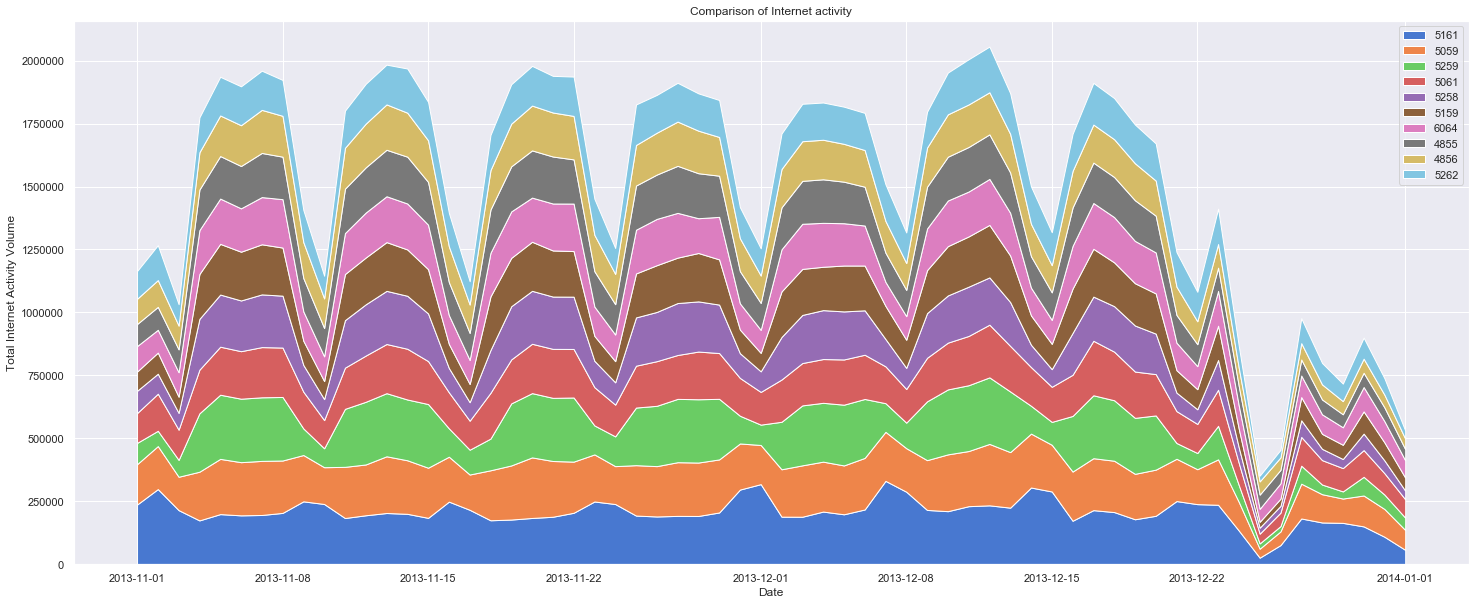

In [16]:
#Plot daily Internet activity for top 10 grids from Nov 1, 2013 to Jan 1, 2014
plt.figure(figsize=(25,10))
ax = plt.stackplot(daily5161.index, daily5161.internet,daily5059.internet,
                   daily5259.internet, daily5061.internet, daily5258.internet,
                   daily5159.internet, daily6064.internet, daily4855.internet,
                   daily4856.internet, daily5262.internet,
                   labels = top10['internet'],colors=col)
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Total Internet Activity Volume')
plt.title('Comparison of Internet activity')
plt.show()

# Statistical Analysis of top 10 grids

First 4 grids have highly varying total volume and rest of the grids have almost same total volume for each activity. This is further verified by performing a set of one-way ANOVA tests.    
P-value < 0.05 indicates rejects the Null hypothesis that the mean values are equal.

In [17]:
#import scipy.stats to perform One-Way ANOVA teste
import scipy.stats as stats

In [18]:
#Comparison of mean SMS values of top 4 grids 
stats.f_oneway(daily5059.sms.to_list(), daily5161.sms.to_list(), daily6064.sms.to_list(), daily5061.sms.to_list())

F_onewayResult(statistic=15.6837152166561, pvalue=2.3305180034398526e-09)

In [19]:
#Comparison of mean SMS values of rest of the grids from the top 10 list
stats.f_oneway(daily5159.sms.to_list(), daily5259.sms.to_list(), daily5262.sms.to_list(), daily4855.sms.to_list(),
               daily4856.sms.to_list(), daily6165.sms.to_list())

F_onewayResult(statistic=1.0806731220881904, pvalue=0.37063204247098347)

In [20]:
#Comparison of mean Call values of top 4 grids 
stats.f_oneway(daily5059.call.to_list(), daily6064.call.to_list(), daily5161.call.to_list(), daily5159.call.to_list())

F_onewayResult(statistic=8.245022535234758, pvalue=3.0159552209709387e-05)

In [21]:
#Comparison of mean Call values of rest of the grids from the top 10 list
stats.f_oneway(daily5061.call.to_list(), daily5259.call.to_list(), daily6165.call.to_list(), daily5262.call.to_list(),
               daily6058.call.to_list(), daily5162.call.to_list())

F_onewayResult(statistic=2.089333950123052, pvalue=0.06609465518655394)

In [22]:
#Comparison of mean Internet values of top 4 grids 
stats.f_oneway(daily5161.internet.to_list(), daily5059.internet.to_list(), daily5259.internet.to_list(),
               daily5061.internet.to_list())

F_onewayResult(statistic=8.388137367527829, pvalue=2.5001501890290148e-05)

In [23]:
#Comparison of mean Internet values of rest of the grids from the top 10 list
stats.f_oneway(daily5258.internet.to_list(), daily5159.internet.to_list(), daily6064.internet.to_list(),
               daily4855.internet.to_list(), daily4856.internet.to_list(), daily5262.internet.to_list())

F_onewayResult(statistic=0.42971229199857125, pvalue=0.8278755021476163)

In order to capture variations in the city’s telecommunication activities, we will examine the following four grids that has markedly different behavioral signatures,   
4459 - Bocconi, one of the most famous Universities in Milan    
4456 - Navigli district, one of the most famous nightlife places in Milan    
5060 - Duomo, the city center of Milan    
5646 - Fiera, residential neighborhood of Milan   

#### Comparison of daily activity pattern

<Figure size 1800x720 with 0 Axes>

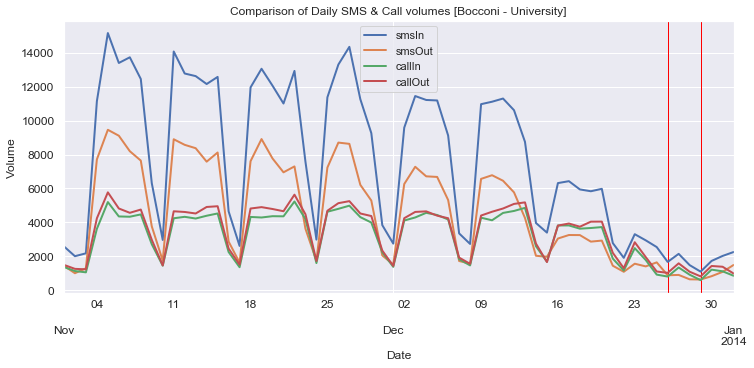

In [24]:
#Next line is to fix an error
pd.plotting.register_matplotlib_converters()

#Plot Daily SMS-In, SMS-Out, Call-In, Call-Out activity pattern for Bocconi - Univerisity
daily4459 = dailyGridActivity.loc[4459]
plt.figure(figsize=(25,10))
ax = daily4459.loc[:,['smsIn', 'smsOut', 'callIn', 'callOut']].plot(figsize=(12, 5), fontsize=12, linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Comparison of Daily SMS & Call volumes [Bocconi - University]')
plt.axvspan('2013-12-26', '2013-12-26', color='red')
plt.axvspan('2013-12-29', '2013-12-29', color='red')
plt.show()

<Figure size 1800x720 with 0 Axes>

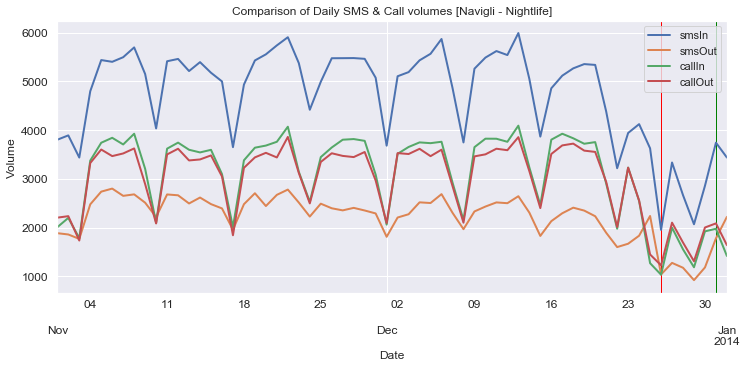

In [25]:
#Plot Daily SMS-In, SMS-Out, Call-In, Call-Out activity pattern for Navigli - Nightlife
daily4456 = dailyGridActivity.loc[4456]
plt.figure(figsize=(25,10))
ax = daily4456.loc[:,['smsIn', 'smsOut', 'callIn', 'callOut']].plot(figsize=(12, 5), fontsize=12, linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Comparison of Daily SMS & Call volumes [Navigli - Nightlife]')
plt.axvspan('2013-12-26', '2013-12-26', color='red')
plt.axvspan('2013-12-31', '2013-12-31', color='green')
plt.show()

<Figure size 1800x720 with 0 Axes>

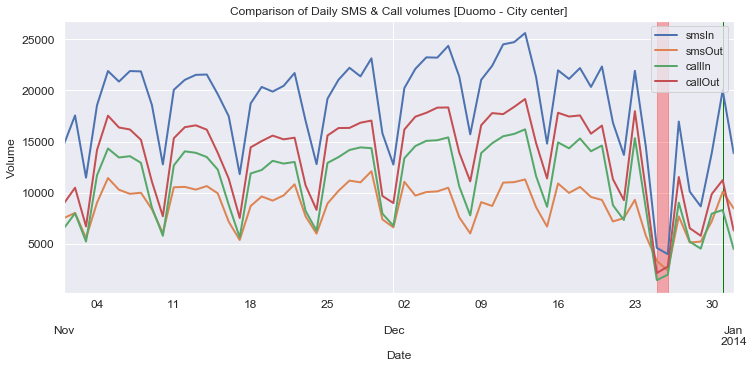

In [26]:
#Plot Daily SMS-In, SMS-Out, Call-In, Call-Out activity pattern for Duomo - City center
daily5059 = dailyGridActivity.loc[5059]
plt.figure(figsize=(25,10))
ax = daily5059.loc[:,['smsIn', 'smsOut', 'callIn', 'callOut']].plot(figsize=(12, 5), fontsize=12, linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Comparison of Daily SMS & Call volumes [Duomo - City center]')
plt.axvspan('2013-12-25', '2013-12-26', color='red', alpha=0.3)
plt.axvspan('2013-12-31', '2013-12-31', color='green')
plt.show()

<Figure size 1800x720 with 0 Axes>

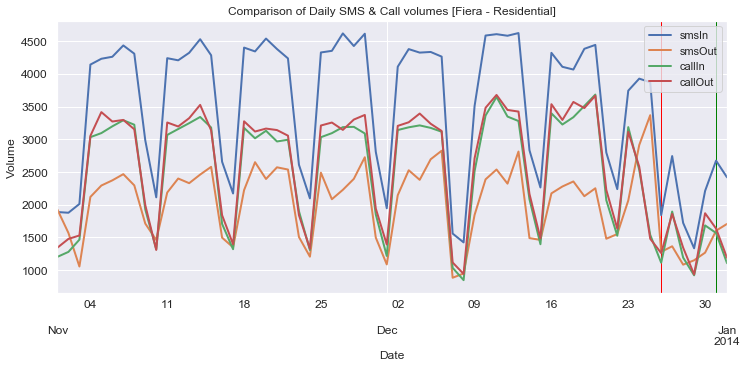

In [27]:
#Plot Daily SMS-In, SMS-Out, Call-In, Call-Out activity pattern for Fiera - Residential
daily5646 = dailyGridActivity.loc[5646]
plt.figure(figsize=(25,10))
ax = daily5646.loc[:,['smsIn', 'smsOut', 'callIn', 'callOut']].plot(figsize=(12, 5), fontsize=12, linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Comparison of Daily SMS & Call volumes [Fiera - Residential]')
plt.axvspan('2013-12-26', '2013-12-26', color='red')
plt.axvspan('2013-12-31', '2013-12-31', color='green')
plt.show()

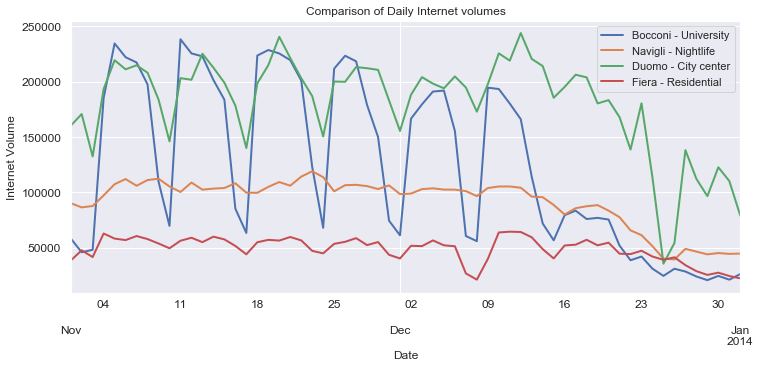

In [28]:
#Plot Daily Internet activity pattern for all four places
plt.figure(figsize=(25,10))
ax = daily4459['internet'].plot(figsize=(12, 5), fontsize=12, linewidth=2, label = 'Bocconi - University', legend='True')
ax = daily4456['internet'].plot(figsize=(12, 5), fontsize=12, linewidth=2, label = 'Navigli - Nightlife', legend='True')
ax = daily5059['internet'].plot(figsize=(12, 5), fontsize=12, linewidth=2, label = 'Duomo - City center', legend='True')
ax = daily5646['internet'].plot(figsize=(12, 5), fontsize=12, linewidth=2, label = 'Fiera - Residential', legend='True')
plt.xlabel('Date')
plt.ylabel('Internet Volume')
plt.title('Comparison of Daily Internet volumes')
plt.show()

#### Comparison of hourly activity pattern

In [29]:
#Set this to None to avoid Warning messages from Pandas
pd.options.mode.chained_assignment = None

#Get hourly data for the four grids 
hourly4459 = hourlyGridActivity.loc[4459]
hourly4456 = hourlyGridActivity.loc[4456]
hourly5059 = hourlyGridActivity.loc[5059]
hourly5646 = hourlyGridActivity.loc[5646]

#Add column to identify Day of the week for each observation
hourly4459['dayOfWeek'] = hourly4459.index.day_name()
hourly4456['dayOfWeek'] = hourly4456.index.day_name()
hourly5059['dayOfWeek'] = hourly5059.index.day_name()
hourly5646['dayOfWeek'] = hourly5646.index.day_name()

#Use pivot_table() reshape the dataframe with Mean values of the acitivities for Day of the week as columns and hours in a day as index
hourly4459_sms = hourly4459.pivot_table(index=hourly4459.index.hour,
                                                            columns='dayOfWeek', values='sms', aggfunc='mean')
hourly4459_call = hourly4459.pivot_table(index=hourly4459.index.hour,
                                                            columns='dayOfWeek', values='call', aggfunc='mean')
hourly4459_internet = hourly4459.pivot_table(index=hourly4459.index.hour,
                                                            columns='dayOfWeek', values='internet', aggfunc='mean')
hourly4456_sms = hourly4456.pivot_table(index=hourly4456.index.hour,
                                                            columns='dayOfWeek', values='sms', aggfunc='mean')
hourly4456_call = hourly4456.pivot_table(index=hourly4456.index.hour,
                                                            columns='dayOfWeek', values='call', aggfunc='mean')
hourly4456_internet = hourly4456.pivot_table(index=hourly4456.index.hour,
                                                            columns='dayOfWeek', values='internet', aggfunc='mean')
hourly5059_sms = hourly5059.pivot_table(index=hourly5059.index.hour,
                                                            columns='dayOfWeek', values='sms', aggfunc='mean')
hourly5059_call = hourly5059.pivot_table(index=hourly5059.index.hour,
                                                            columns='dayOfWeek', values='call', aggfunc='mean')
hourly5059_internet = hourly5059.pivot_table(index=hourly5059.index.hour,
                                                            columns='dayOfWeek', values='internet', aggfunc='mean')
hourly5646_sms = hourly5646.pivot_table(index=hourly5646.index.hour,
                                                            columns='dayOfWeek', values='sms', aggfunc='mean')
hourly5646_call = hourly5646.pivot_table(index=hourly5646.index.hour,
                                                            columns='dayOfWeek', values='call', aggfunc='mean')
hourly5646_internet = hourly5646.pivot_table(index=hourly5646.index.hour,
                                                    columns='dayOfWeek', values='internet', aggfunc='mean')

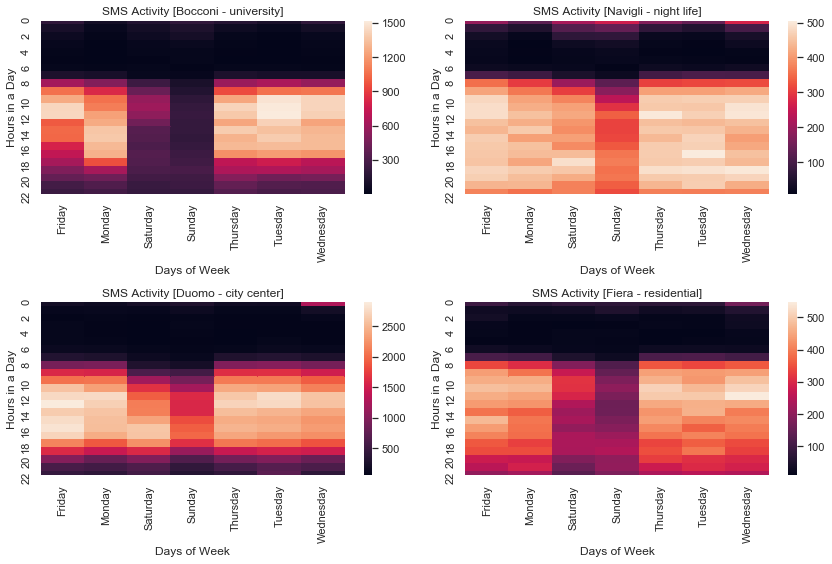

In [32]:
#From the reshaped dataframe plot heatmap for SMS activity of the four grids
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
ax[0][0].set_title("SMS Activity [Bocconi - university]")
ax[0][1].set_title("SMS Activity [Navigli - night life]")
ax[1][0].set_title("SMS Activity [Duomo - city center]")
ax[1][1].set_title("SMS Activity [Fiera - residential]")

sns.heatmap(hourly4459_sms, ax=ax[0][0])
ax[0][0].set_ylabel("Hours in a Day")
ax[0][0].set_xlabel("Days of Week")
sns.heatmap(hourly4456_sms, ax=ax[0][1])
ax[0][1].set_ylabel("Hours in a Day")
ax[0][1].set_xlabel("Days of Week")
sns.heatmap(hourly5059_sms, ax=ax[1][0])
ax[1][0].set_ylabel("Hours in a Day")
ax[1][0].set_xlabel("Days of Week")
sns.heatmap(hourly5646_sms, ax=ax[1][1])
ax[1][1].set_ylabel("Hours in a Day")
ax[1][1].set_xlabel("Days of Week")
fig. tight_layout()

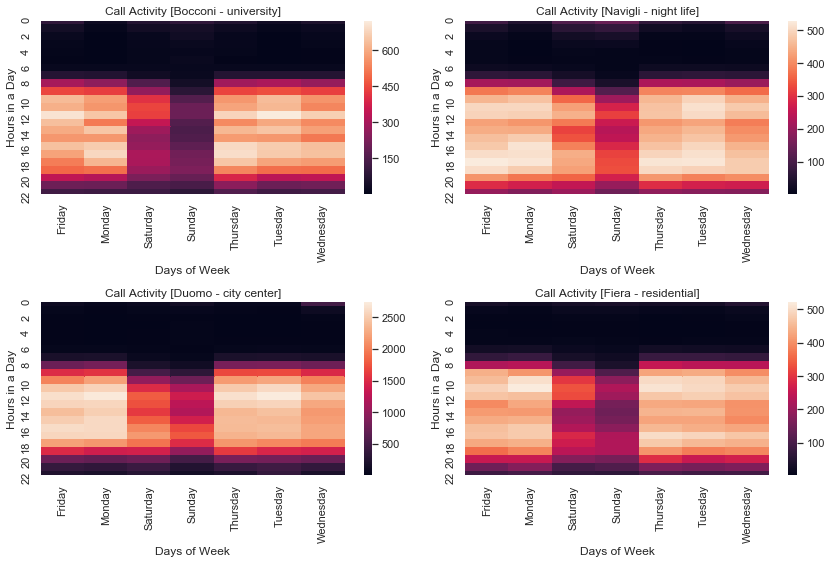

In [33]:
#From the reshaped dataframe plot heatmap for Call activity of the four grids
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
ax[0][0].set_title("Call Activity [Bocconi - university]")
ax[0][1].set_title("Call Activity [Navigli - night life]")
ax[1][0].set_title("Call Activity [Duomo - city center]")
ax[1][1].set_title("Call Activity [Fiera - residential]")

sns.heatmap(hourly4459_call, ax=ax[0][0])
ax[0][0].set_ylabel("Hours in a Day")
ax[0][0].set_xlabel("Days of Week")
sns.heatmap(hourly4456_call, ax=ax[0][1])
ax[0][1].set_ylabel("Hours in a Day")
ax[0][1].set_xlabel("Days of Week")
sns.heatmap(hourly5059_call, ax=ax[1][0])
ax[1][0].set_ylabel("Hours in a Day")
ax[1][0].set_xlabel("Days of Week")
sns.heatmap(hourly5646_call, ax=ax[1][1])
ax[1][1].set_ylabel("Hours in a Day")
ax[1][1].set_xlabel("Days of Week")
fig. tight_layout()

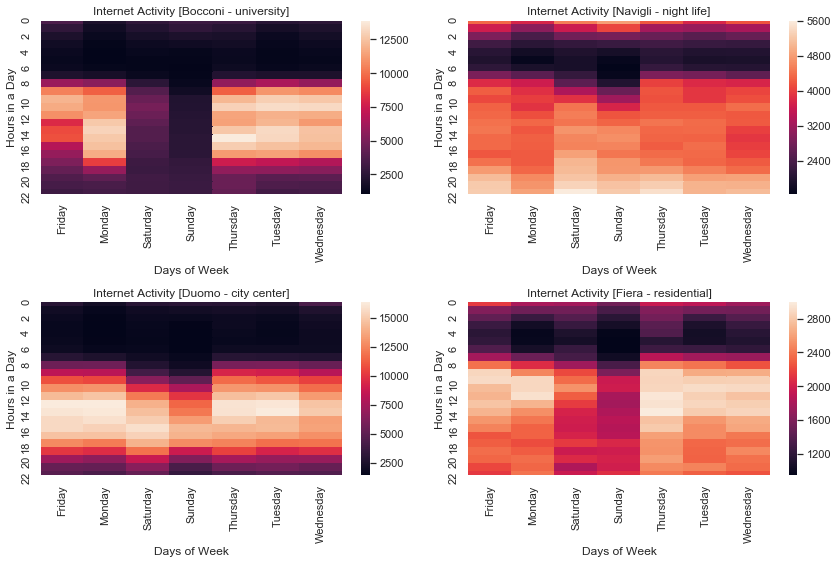

In [34]:
#From the reshaped dataframe plot heatmap for Internet activity of the four grids
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
ax[0][0].set_title("Internet Activity [Bocconi - university]")
ax[0][1].set_title("Internet Activity [Navigli - night life]")
ax[1][0].set_title("Internet Activity [Duomo - city center]")
ax[1][1].set_title("Internet Activity [Fiera - residential]")

sns.heatmap(hourly4459_internet, ax=ax[0][0])
ax[0][0].set_ylabel("Hours in a Day")
ax[0][0].set_xlabel("Days of Week")
sns.heatmap(hourly4456_internet, ax=ax[0][1])
ax[0][1].set_ylabel("Hours in a Day")
ax[0][1].set_xlabel("Days of Week")
sns.heatmap(hourly5059_internet, ax=ax[1][0])
ax[1][0].set_ylabel("Hours in a Day")
ax[1][0].set_xlabel("Days of Week")
sns.heatmap(hourly5646_internet, ax=ax[1][1])
ax[1][1].set_ylabel("Hours in a Day")
ax[1][1].set_xlabel("Days of Week")
fig. tight_layout()

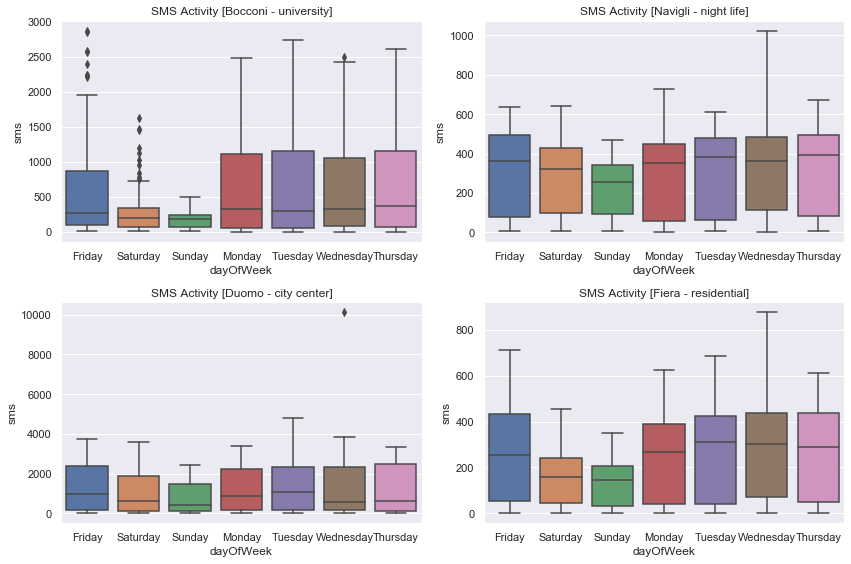

In [35]:
#Plot box plot of SMS activity for each day of the week
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
ax[0][0].set_title("SMS Activity [Bocconi - university]")
ax[0][1].set_title("SMS Activity [Navigli - night life]")
ax[1][0].set_title("SMS Activity [Duomo - city center]")
ax[1][1].set_title("SMS Activity [Fiera - residential]")

sns.boxplot(hourly4459['dayOfWeek'], hourly4459['sms'], ax=ax[0][0])
sns.boxplot(hourly4456['dayOfWeek'], hourly4456['sms'], ax=ax[0][1])
sns.boxplot(hourly5059['dayOfWeek'], hourly5059['sms'], ax=ax[1][0])
sns.boxplot(hourly5646['dayOfWeek'], hourly5646['sms'], ax=ax[1][1])
fig. tight_layout()

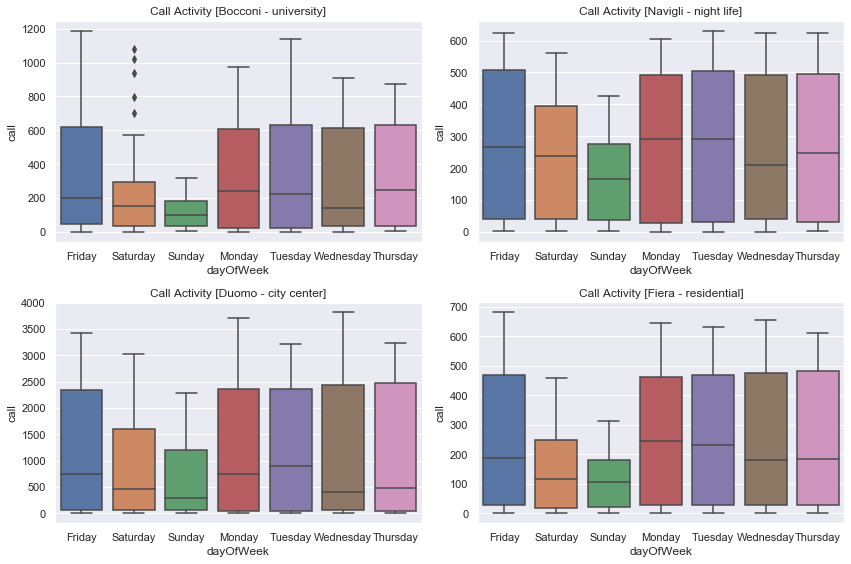

In [36]:
#Plot box plot of Call activity for each day of the week
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
ax[0][0].set_title("Call Activity [Bocconi - university]")
ax[0][1].set_title("Call Activity [Navigli - night life]")
ax[1][0].set_title("Call Activity [Duomo - city center]")
ax[1][1].set_title("Call Activity [Fiera - residential]")

sns.boxplot(hourly4459['dayOfWeek'], hourly4459['call'], ax=ax[0][0])
sns.boxplot(hourly4456['dayOfWeek'], hourly4456['call'], ax=ax[0][1])
sns.boxplot(hourly5059['dayOfWeek'], hourly5059['call'], ax=ax[1][0])
sns.boxplot(hourly5646['dayOfWeek'], hourly5646['call'], ax=ax[1][1])
fig. tight_layout()

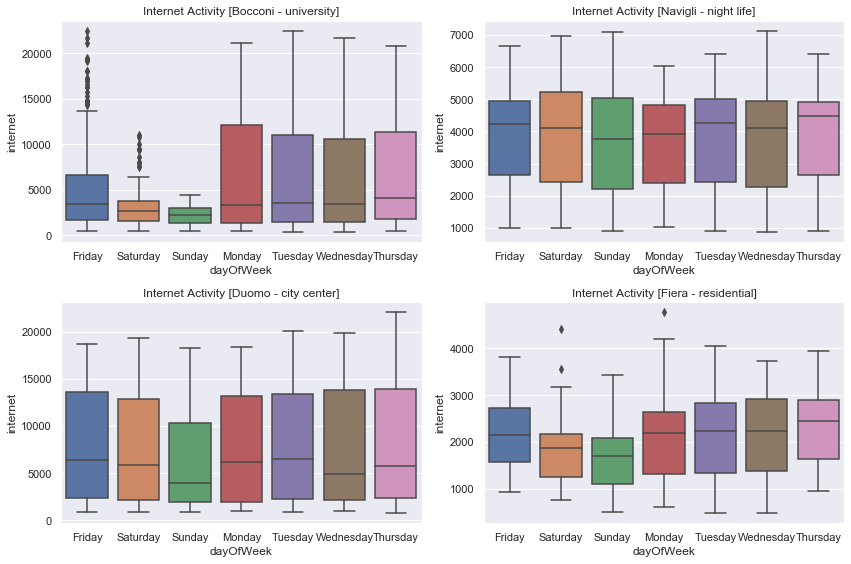

In [37]:
#Plot box plot of Internet activity for each day of the week
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
ax[0][0].set_title("Internet Activity [Bocconi - university]")
ax[0][1].set_title("Internet Activity [Navigli - night life]")
ax[1][0].set_title("Internet Activity [Duomo - city center]")
ax[1][1].set_title("Internet Activity [Fiera - residential]")

sns.boxplot(hourly4459['dayOfWeek'], hourly4459['internet'], ax=ax[0][0])
sns.boxplot(hourly4456['dayOfWeek'], hourly4456['internet'], ax=ax[0][1])
sns.boxplot(hourly5059['dayOfWeek'], hourly5059['internet'], ax=ax[1][0])
sns.boxplot(hourly5646['dayOfWeek'], hourly5646['internet'], ax=ax[1][1])
fig. tight_layout()